    
# <p style="background-color:#EA1D2C;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Marketing Campaign Analysis</p>

<img src="https://images.unsplash.com/photo-1454165804606-c3d57bc86b40?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2070&q=80" width="500" height="600">


### <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#EA1D2C;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>
    
---
* [Data Preprocessing](#section_1)
    * [Import Modules and packages](#section_1_1)
    * [Knowing the dataset](#section_1_2)
    * [Preparing the data](#section_1_3)
    * [Feature Engineering](#section_1_4)
---
* [Exploratory Data Analysis](#section_2)
    
    * [Numerical features correlation](#section_2_1)
    * [Response rate analysis](#section_2_2)

#  <a class="anchor" id="section_1" style="color: red">1. Data Preprocessing</a>

#  <a class="anchor" id="section_1_1" style="color: red">1.1 Import Modules and packages</a>

In [669]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from sklearn.cluster import KMeans
color = sns.color_palette("tab10")

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

### Util functions

In [670]:
def barplot_graph(x,y,dataset,ylabel,xlabel, title,y_limit, desl):
    plt.figure(figsize=(10,8))
    ax = sns.barplot(x =x, y=y, data=dataset, alpha=1, color='#0583D2' )
    plt.ylabel(ylabel, fontsize=18)
    plt.xlabel(xlabel, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=13)
    plt.title(title, fontsize=18)
    plt.ylim(0, y_limit)
    plt.xticks(rotation=0)

    
    # label each bar in barplot
    for p in ax.patches:
     # get the height of each bar
     height = p.get_height()
     # adding text to each bar
     ax.text(fontsize=16, x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
     y = height+desl, # y-coordinate position of data label, padded 100 above bar
     s = '{:.2f}'.format(height), # data label, formatted to ignore decimals
     ha = 'center') # sets horizontal alignment (ha) to center

# <a class="anchor" id="section_1_2" style="color: red">1.2 Knowing the data </a>

In [671]:
# Load the dataset
raw_ifood_df = pd.read_csv('ml_project1_data.csv')
raw_ifood_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [672]:
#Dataset information
raw_ifood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

With the command .info() we can see the information information about our dataset:
 - We have 2 <b>columns with categorical variables</b> and 27 <b>columns with numerical variables</b>
 - We have <b>Income column with missing data</b> in 24 obsertavions

In [673]:
#Distinct values in each column
raw_ifood_df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

With the command .nunique() we can see two columns with just one distinct value <b>Z_CostContact</b> and <b>Z_Revenue</b>, this columns can't provide util information and they will be dropped.


#  <a class="anchor" id="section_1_3" style="color: red">1.3 Preparing the data</a>

### Filling missing values

First the missing values need to be handle in the <b>Income</b> column. Usually the Income is connected with education level and age, let's evaluate if this is true in this case.

In [674]:
#Verify age and income corelation
# Create Customer Age Column
raw_ifood_df['Age'] = 2014 - raw_ifood_df['Year_Birth']
print('Correlation beetween Age and Income: {}'.format( raw_ifood_df['Age'].corr(raw_ifood_df['Income'])))

Correlation beetween Age and Income: 0.16179142819632983


Age is not high correlated with Income, maybe this is not a good filter to define missing incomes.

<AxesSubplot:>

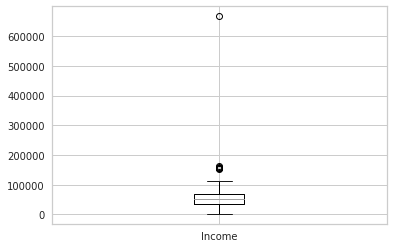

In [675]:
raw_ifood_df.boxplot(column=['Income'])

In [676]:
#Remove outlier of 666666
raw_ifood_df = raw_ifood_df[raw_ifood_df['Income']<600000]

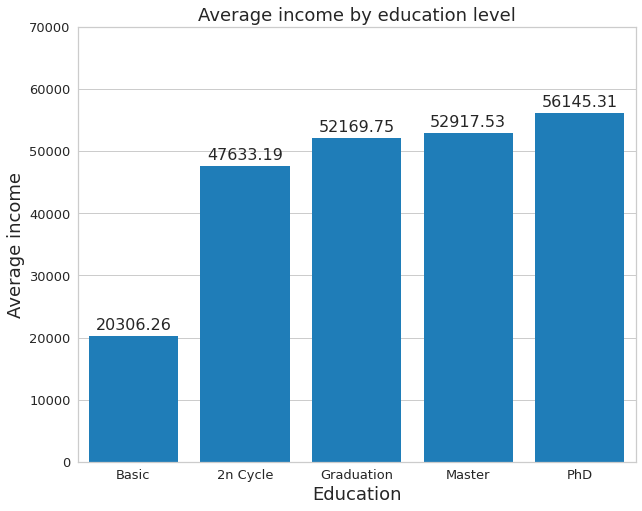

In [677]:
#Verify if the average income increase with the education level
edu_income = raw_ifood_df.groupby(by=["Education"]).mean()
edu_income = edu_income.reset_index()
edu_income = edu_income.reindex([1,0,2,3,4])
barplot_graph(edu_income['Education'],edu_income['Income'],edu_income,'Average income','Education', 'Average income by education level',70000, 1000)

As we can see the difference beetween the Phd average income and the Basic average income is pretty big and show us that the education level is connected with higher incomes. This column will be used to fill the null values with the mean income of each education level.

In [678]:
null_rows = raw_ifood_df[raw_ifood_df['Income'].isnull()].index.tolist()
for row in null_rows:
    if raw_ifood_df.Education.iloc[row] == 'Graduation':
        raw_ifood_df.Income.iloc[row] = 52720
    if raw_ifood_df.Education.iloc[row] == '2n Cycle':
        raw_ifood_df.Income.iloc[row] = 47633
    if raw_ifood_df.Education.iloc[row] == 'Master':
        raw_ifood_df.Income.iloc[row] = 52917
    else:
        raw_ifood_df.Income.iloc[row] = 56145

### Drop columns with one distinct value

In [679]:
#Drop Columns with just onde distinct value
res = raw_ifood_df
for col in raw_ifood_df.columns:
    if len(raw_ifood_df[col].unique()) == 1:
        res = res.drop(col,axis=1)

raw_ifood_df = res

#  <a class="anchor" id="section_1_4" style="color: red">1.4 Feature Engineering</a>

Some columns with possible util information need to be converted or created

- <b>Dt_Customer</b> will de converted to days in the new column <b>Enroll_days</b>
- <b>Kidhome</b> and <b>Teenhome</b> will be create the column <b>Child_number</b>
- <b>Mnt</b> columns will be added to each other to create the column <b>Mnt_Total</b>
- <b>Num...Purchases</b> columns will be added to each other to create the column <b>Total_purchases</b>

In [680]:
# Number of days as a customer
raw_ifood_df['Enroll_Days'] = (pd.to_datetime('2014-06-29') - pd.to_datetime(raw_ifood_df['Dt_Customer'])) // np.timedelta64(1,'D') 

In [681]:
#Number of children at home
raw_ifood_df['Child_number'] = raw_ifood_df['Kidhome'] + raw_ifood_df['Teenhome']

In [682]:
#Total amount spent
raw_ifood_df['Mnt_Total'] = raw_ifood_df['MntWines'] + raw_ifood_df['MntFruits']\
+ raw_ifood_df['MntMeatProducts'] + raw_ifood_df['MntFishProducts']\
+ raw_ifood_df['MntSweetProducts'] + raw_ifood_df['MntGoldProds']

In [683]:
#Total number of purchases
raw_ifood_df['Total_purchases'] =  raw_ifood_df['NumWebPurchases']\
+ raw_ifood_df['NumCatalogPurchases'] + raw_ifood_df['NumStorePurchases']

In [684]:
#Total number of responses in the 5 campaigns and sample campaign
raw_ifood_df['Total_responses'] = raw_ifood_df['AcceptedCmp1'] + raw_ifood_df['AcceptedCmp2']\
+ raw_ifood_df['AcceptedCmp3'] + raw_ifood_df['AcceptedCmp4'] + raw_ifood_df['AcceptedCmp5']+ raw_ifood_df['Response']

In [685]:
#Positive response at least in one campaign
raw_ifood_df['Pos_response'] = [1 if x >= 1 else 0 for x in raw_ifood_df['Total_responses']]

#  <a class="anchor" id="section_2" style="color: red">2. Exploratory Data Analysis</a>

##  <a class="anchor" id="section_2_1" style="color: red">2.1 Numerical features correlation</a>

Let's check how numerical features are correlated.

<AxesSubplot:>

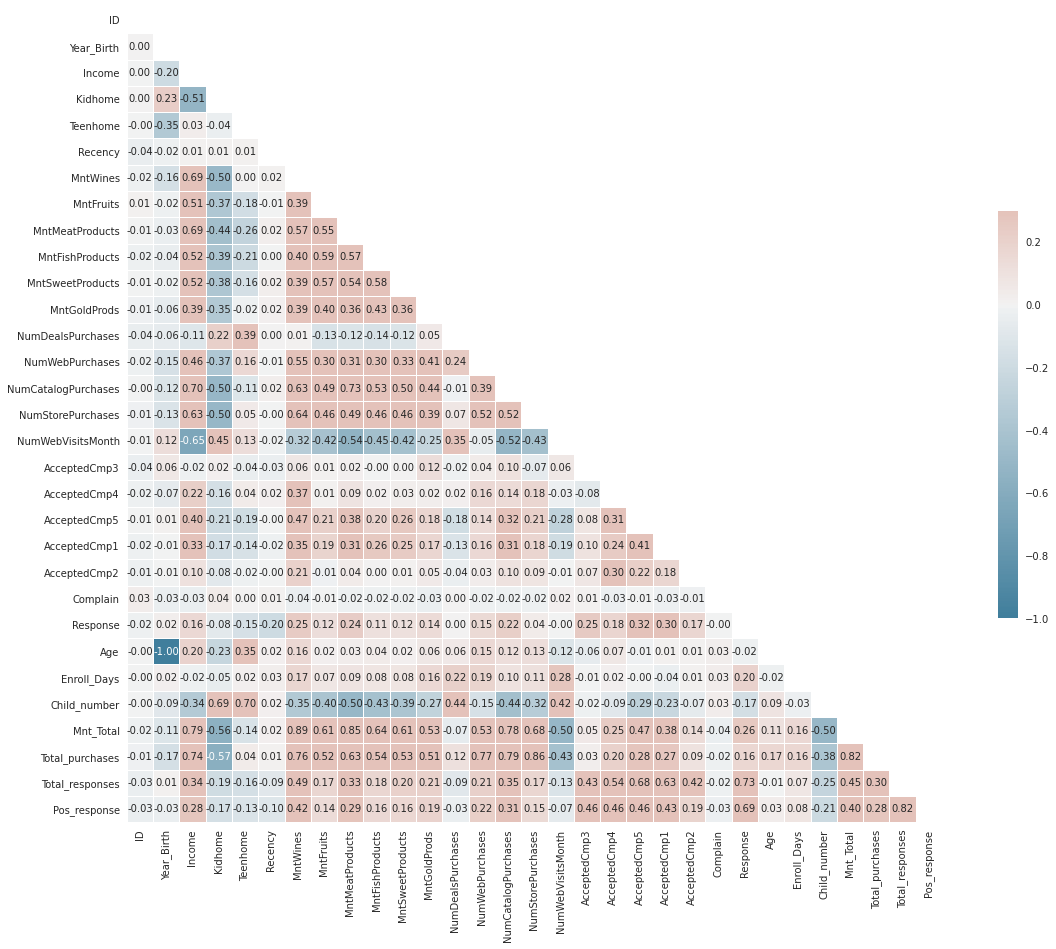

In [686]:
corr=raw_ifood_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')

### <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#EA1D2C;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">NUMERICAL FEATURES CORRELATION INSIGHTS</p>
    

First let's define correlation ranges

| Correlation | Value |
|----|----|
| very highly correlated | 0.9 and 1.0 |
| highly correlated | 0.7 and 0.9|
| moderately correlated | 0.5 and 0.7|
| low correlation | 0.3 and 0.5|
| little if any correlation | less than 0.3|


1 - We can see a moderate negative correlation between variables like <b>Kidhome, Child_number</b> and <b>Mnt_Total </b> we can interpret this as: more kids less purchases;

2 - A moderate correlation between <b>Income</b> and <b>Mnt_Total </b> wich could means: higher the income more money the customer spend with us;

3 - A high correlation between <b>NumCatalogPurchases</b> and <b>MntMeatProducts</b> show us that our costumers usually buy meat using the catalog;

4 - The greater the amount spent by a customer, the greater the purchase of meat and wine the high correlation between this variables can show us this statement.

5 - We can see that the higher a customer spends, the less he visits the website. Where <b>Mnt_total</b> and <b>NumWebVisitsMonth</b> have a moderate negative correlation.

We can see another interesting correlations, but let's move on for now.

#  <a class="anchor" id="section_2_2" style="color: red">2.2 Response rate analysis</a>

Let's see how each variable in the customer profile is connected with the response in the last five campaings evaluating the response rate.

### Campaigns success rate

In [687]:
campaign_1_rate = round(raw_ifood_df['AcceptedCmp1'].sum()/raw_ifood_df.shape[0]*100,2)
campaign_2_rate = round(raw_ifood_df['AcceptedCmp2'].sum()/raw_ifood_df.shape[0]*100,2)
campaign_3_rate = round(raw_ifood_df['AcceptedCmp3'].sum()/raw_ifood_df.shape[0]*100,2)
campaign_4_rate = round(raw_ifood_df['AcceptedCmp4'].sum()/raw_ifood_df.shape[0]*100,2)
campaign_5_rate = round(raw_ifood_df['AcceptedCmp5'].sum()/raw_ifood_df.shape[0]*100,2)
campaign_6_rate = round(raw_ifood_df['Response'].sum()/raw_ifood_df.shape[0]*100,2)

In [688]:
d = {'Camp_Rate': [campaign_1_rate, campaign_2_rate, campaign_3_rate, campaign_4_rate, campaign_5_rate, campaign_6_rate],\
     'Camp_name': ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Sample Campaign']}
campaign_rate_df = pd.DataFrame(data=d)

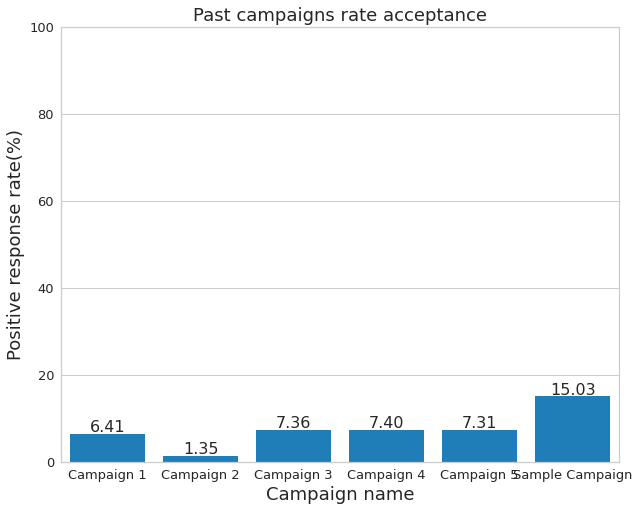

In [689]:
barplot_graph(campaign_rate_df['Camp_name'],campaign_rate_df['Camp_Rate'],campaign_rate_df,'Positive response rate(%)','Campaign name', 'Past campaigns rate acceptance',100, 0.5)

The past campaings were very unsuccessful with the biggest rate of 14,91%.

### Average spents from customer who accepted at least one offer x customer who didn't accept.

In [690]:
average_accept = raw_ifood_df[raw_ifood_df['Pos_response']>0]
average_neg = raw_ifood_df[raw_ifood_df['Pos_response']==0]

print('Average spent in stores of customer who accepted at least one offer: {}'.format(round(average_accept['Mnt_Total'].mean(),2)))
print('Average spent in stores of customer who didn\'t accept any offer: {}'.format(round(average_neg['Mnt_Total'].mean(),2)))

d = {'Avr_spent': [round(average_accept['Mnt_Total'].mean(),2), round(average_neg['Mnt_Total'].mean(),2)],\
                   'Class': ['Positive', 'Negative']}
average_spent_df = pd.DataFrame(data=d)

Average spent in stores of customer who accepted at least one offer: 998.19
Average spent in stores of customer who didn't accept any offer: 460.44


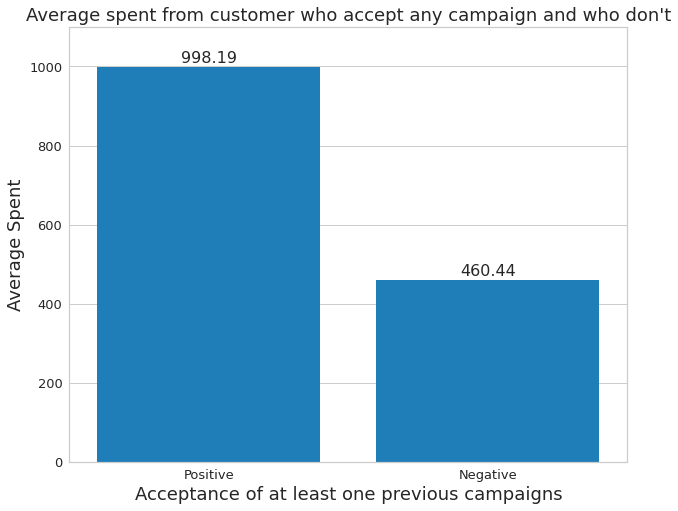

In [691]:
barplot_graph(average_spent_df['Class'],average_spent_df['Avr_spent'],average_spent_df,'Average Spent','Acceptance of at least one previous campaigns', 'Average spent from customer who accept any campaign and who don\'t',1100, 10)

We can see that our customers who have accepted offers from previous campaigns, on average spend more money on our products when compared to customers who have not.

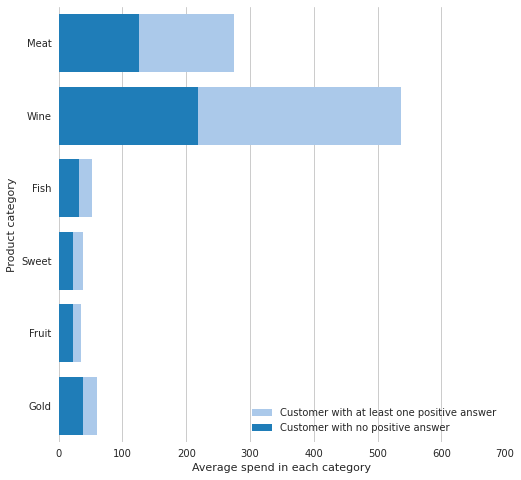

In [692]:
average_accept_meat = round(average_accept['MntMeatProducts'].mean(),2)
average_neg_meat = round(average_neg['MntMeatProducts'].mean(),2)
average_accept_wine = round(average_accept['MntWines'].mean(),2)
average_neg_wine = round(average_neg['MntWines'].mean(),2)
average_accept_fish = round(average_accept['MntFishProducts'].mean(),2)
average_neg_fish = round(average_neg['MntFishProducts'].mean(),2)
average_accept_sweet = round(average_accept['MntSweetProducts'].mean(),2)
average_neg_sweet = round(average_neg['MntSweetProducts'].mean(),2)
average_accept_fruits = round(average_accept['MntFruits'].mean(),2)
average_neg_fruits = round(average_neg['MntFruits'].mean(),2)
average_accept_gold = round(average_accept['MntGoldProds'].mean(),2)
average_neg_gold = round(average_neg['MntGoldProds'].mean(),2)

d = {'Avr_accept': [average_accept_meat, average_accept_wine, average_accept_fish, average_accept_sweet, average_accept_fruits, average_accept_gold],\
                   'Class': ['Meat', 'Wine', 'Fish', 'Sweet', 'Fruit', 'Gold']}
average_spent_accept = pd.DataFrame(data=d)

d = {'Avr_neg': [average_neg_meat, average_neg_wine, average_neg_fish, average_neg_sweet, average_neg_fruits, average_neg_gold],\
                   'Class': ['Meat', 'Wine', 'Fish', 'Sweet', 'Fruit', 'Gold']}
average_spent_neg = pd.DataFrame(data=d)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Avr_accept", y="Class", data=average_spent_accept, label="Customer with at least one positive answer", color="b")

# Plot the average spent
sns.set_color_codes("muted")
sns.barplot(x="Avr_neg", y="Class", data=average_spent_neg, label="Customer with no positive answer", color='#0583D2')

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=False)
ax.set(xlim=(0, 700), ylabel="Product category",
       xlabel="Average spend in each category")
sns.despine(left=True, bottom=True)

A large part of this spending is located in meat and wine products where customers who accepted a campaign spend on average twice as much when compared to customers who did not accept any campaign.

### Positive campaing response by education level

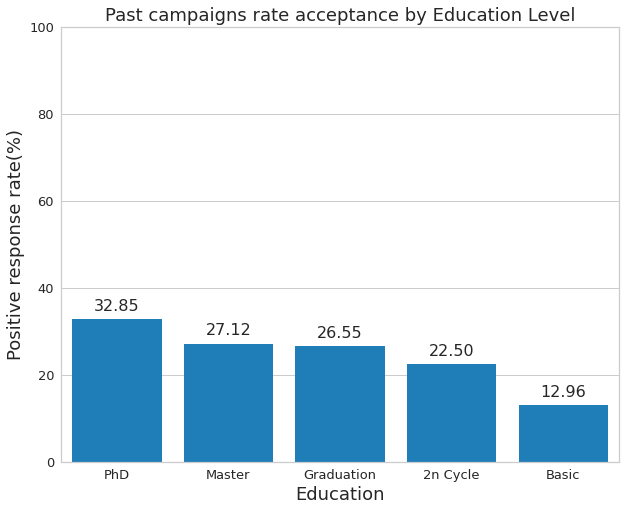

In [693]:
education_rate = round(raw_ifood_df.groupby('Education')['Pos_response'].mean().sort_values(ascending = False)*100,2)
education_rate = education_rate.reset_index()
barplot_graph(education_rate['Education'],education_rate['Pos_response'],education_rate,'Positive response rate(%)','Education', 'Past campaigns rate acceptance by Education Level',100, 2)

We can see that 32,51% of the PhD accepted the offer in at least one of the six campaigns. Another good insight is the increase in offer acceptance as education level increases

### Positive campaing response by marital status

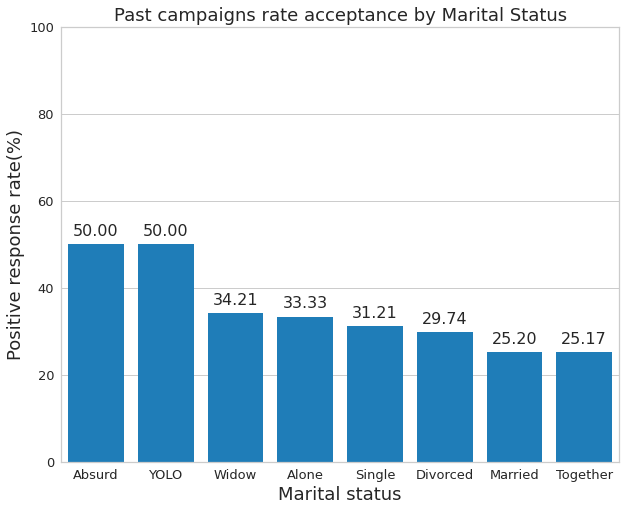

In [694]:
marital_rate = round(raw_ifood_df.groupby('Marital_Status')['Pos_response'].mean().sort_values(ascending = False)*100,2)
marital_rate = marital_rate.reset_index()
barplot_graph(marital_rate['Marital_Status'],marital_rate['Pos_response'],marital_rate,'Positive response rate(%)','Marital status', 'Past campaigns rate acceptance by Marital Status',100, 2)

We can see people living wihtout a partner are more likely to accept the offer.

### Positive campaing response by children at home

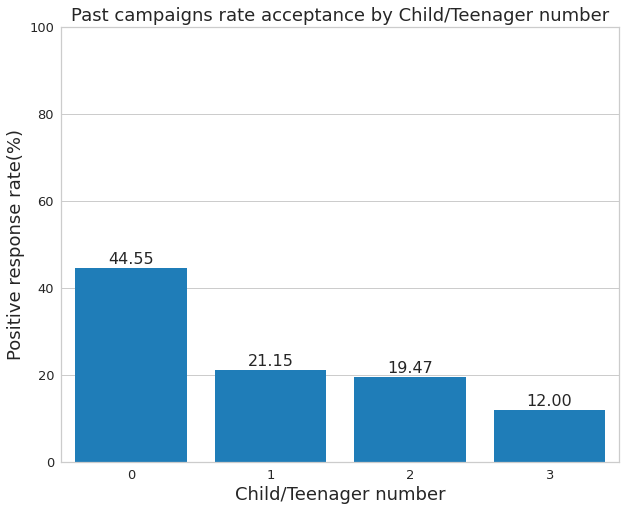

In [695]:
child_rate = round(raw_ifood_df.groupby('Child_number')['Pos_response'].mean().sort_values(ascending = False)*100,2)
child_rate = child_rate.reset_index()
barplot_graph(child_rate['Child_number'],child_rate['Pos_response'],child_rate,'Positive response rate(%)','Child/Teenager number', 'Past campaigns rate acceptance by Child/Teenager number',100, 1)

There is a higher response rate from people with no children at home what probably is connected with no partners previous analysis.

### Positive campaing response by number of purchases

In [696]:
#Verify the minimum and maximum number of purchases
print('Min number of purchases: {}'.format(raw_ifood_df['Total_purchases'].min()))
print('Max number of purchases: {}'.format(raw_ifood_df['Total_purchases'].max()))

Min number of purchases: 0
Max number of purchases: 32


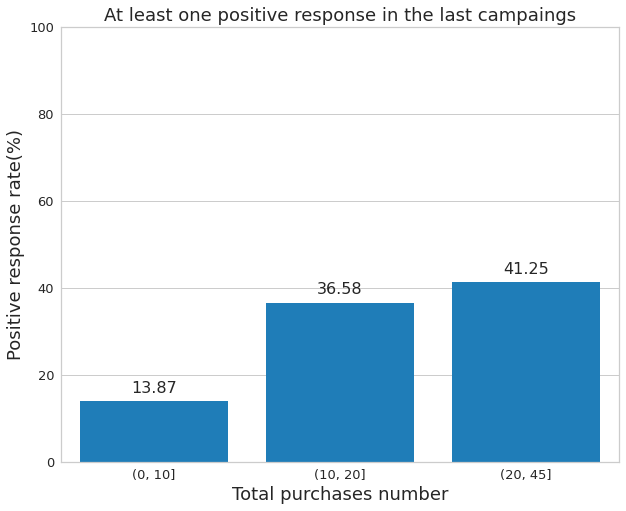

In [697]:
#Create cut points in the number of purchases to better analyse
#bins defined to similar number of observations in each category
bins = [0,10,20,45]
s1 = pd.cut(raw_ifood_df.Total_purchases, bins = bins)
purchases_rate= pd.concat([s1, raw_ifood_df.Pos_response], axis = 1)
purchases_rate = round(purchases_rate.groupby('Total_purchases')['Pos_response'].mean().sort_values(ascending = False)*100,2)
purchases_rate = purchases_rate.reset_index()
purchases_rate.head(20)
barplot_graph(purchases_rate['Total_purchases'],purchases_rate['Pos_response'],purchases_rate,'Positive response rate(%)','Total purchases number', 'At least one positive response in the last campaings',100, 2)

We can see that the more purchases a consumer has, the more likely he is to accept the campaing offer.

### Positive campaing response by recency

In [698]:
#Verify the minimum and maximum number of purchases
print('Min days since the last purchases: {}'.format(raw_ifood_df['Recency'].min()))
print('Max days since the last purchases: {}'.format(raw_ifood_df['Recency'].max()))

Min days since the last purchases: 0
Max days since the last purchases: 99


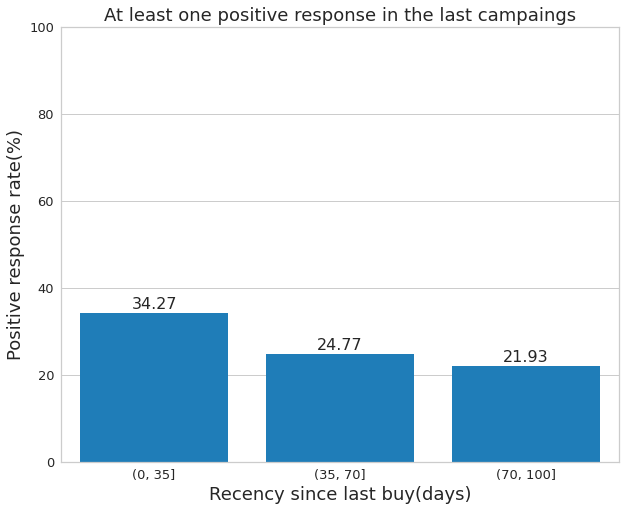

In [699]:
#Create cut points in the number of purchases to better analyse
#bins defined to similar number of observations in each category
bins = [0,35,70,100]
s1 = pd.cut(raw_ifood_df.Recency, bins = bins)
recency_rate= pd.concat([s1, raw_ifood_df.Pos_response], axis = 1)
recency_rate = round(recency_rate.groupby('Recency')['Pos_response'].mean().sort_values(ascending = False)*100,2)
recency_rate = recency_rate.reset_index()
barplot_graph(recency_rate['Recency'],recency_rate['Pos_response'],recency_rate,'Positive response rate(%)','Recency since last buy(days)', 'At least one positive response in the last campaings',100, 1)

Customers who buy more frequently are reacting to the marketing campaign more positively.

### Positive campaing response by age

In [700]:
#Verify the minimum and maximum number of purchases
print('Min age: {}'.format(raw_ifood_df['Age'].min()))
print('Max age: {}'.format(raw_ifood_df['Age'].max()))

Min age: 18
Max age: 121


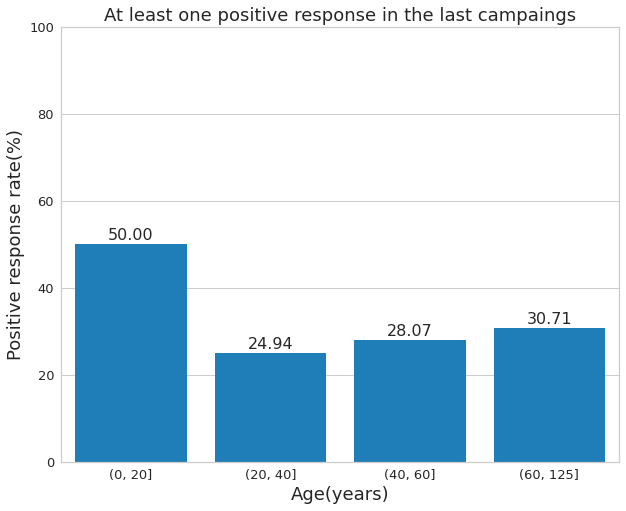

In [701]:
#Create cut points in the number of purchases to better analyse
#bins defined to similar number of observations in each category
bins = [0,20,40,60,125]
s1 = pd.cut(raw_ifood_df.Age, bins = bins)
recency_rate= pd.concat([s1, raw_ifood_df.Pos_response], axis = 1)
recency_rate = round(recency_rate.groupby('Age')['Pos_response'].mean().sort_values(ascending = False)*100,2)
recency_rate = recency_rate.reset_index()
barplot_graph(recency_rate['Age'],recency_rate['Pos_response'],recency_rate,'Positive response rate(%)','Age(years)', 'At least one positive response in the last campaings',100, 1)

Younger people accepted the campaing offer with a higher frequency when compared with adult and elderly people.

In [702]:
#Verify the minimum and maximum number of purchases
print('Min days since the last purchases: {}'.format(raw_ifood_df['Mnt_Total'].min()))
print('Max days since the last purchases: {}'.format(raw_ifood_df['Mnt_Total'].max()))

Min days since the last purchases: 5
Max days since the last purchases: 2525


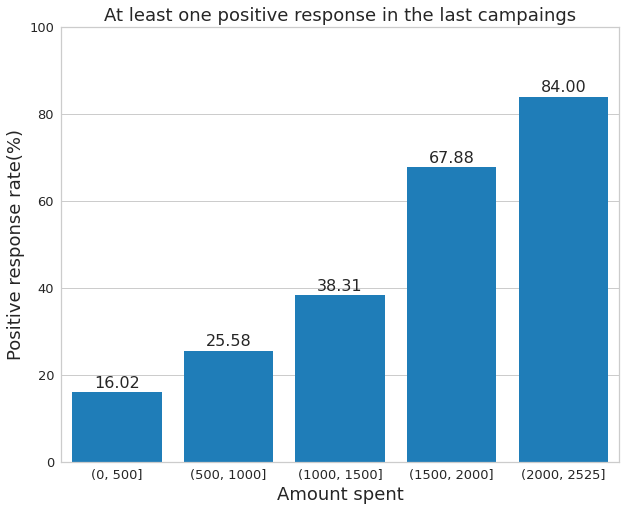

In [703]:
#Create cut points in the number of purchases to better analyse
#bins defined to similar number of observations in each category
bins = [0,500,1000,1500,2000,2525]
s1 = pd.cut(raw_ifood_df.Mnt_Total, bins = bins)
recency_rate= pd.concat([s1, raw_ifood_df.Pos_response], axis = 1)
recency_rate = round(recency_rate.groupby('Mnt_Total')['Pos_response'].mean().sort_values(ascending = False)*100,2)
recency_rate = recency_rate.reset_index()
barplot_graph(recency_rate['Mnt_Total'],recency_rate['Pos_response'],recency_rate,'Positive response rate(%)','Amount spent', 'At least one positive response in the last campaings',100, 1)

### <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#EA1D2C;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">RESPONSE RATE ANALYSIS INSIGHTS</p>
    
   
    
    
    

 Insights we have after this brief first analysis:
    
1 - People with a <b> higher level of education </b> are more susceptible to positive responses to campaigns;
    
2 - We can see that people <b>living without a partner</b> are more likely to accept the offer, while people living with a partner accepted the offer about 11% of the times they were contacted;
    
3 - People with <b>no children at home</b> accpeted the campaing offer in a rate of 26,49% what probably is connected with no partners previous analysis, while people with children at home accepted in a max rate of 11,16%;
    
4 - Customers with <b>higher income</b> accepted the campaign more than the lower incomes.

#  <a class="anchor" id="section_2" style="color: red">3. Customer segmentation</a>

#  <a class="anchor" id="section_3_2" style="color: red">3.2 Customer Segmentation using RFM analysis</a>

RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. Once we have this three columns in our dataset we can use this simple, but sometimes very effective.

In [847]:
rfm = raw_ifood_df[['ID','Recency', 'Total_purchases', 'Mnt_Total']]

rfm['r_quartile'] = pd.qcut(raw_ifood_df['Recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(raw_ifood_df['Total_purchases'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(raw_ifood_df['Mnt_Total'], 4, ['4','3','2','1'])

rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)

rfm.sort_values(by='RFM_Score').head()


,ID,Recency,Total_purchases,Mnt_Total,r_quartile,f_quartile,m_quartile,RFM_Score
338,9560,18,21,1674,1,1,1,111
1320,1650,13,26,1643,1,1,1,111
67,9369,19,31,1274,1,1,1,111
1308,5758,23,27,1189,1,1,1,111
135,1685,21,22,1482,1,1,1,111


Now we can segment our customers in groups like in the table bellow, of course 

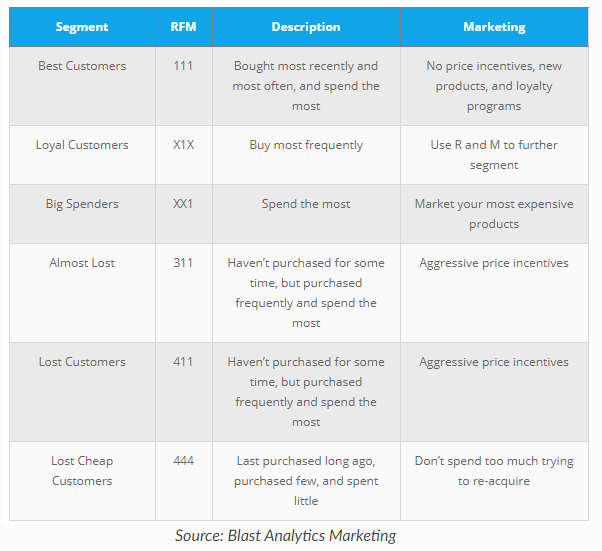

#  <a class="anchor" id="section_3_2" style="color: red">3.2 K-means clustering</a>

### Encoding categorical variables.

In [704]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(raw_ifood_df, columns=['Marital_Status', 'Education'], drop_first=True )

In [705]:
dum_df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,0,0,1,0,0,0,0,1,0,0
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,0,0,1,0,0,0,0,1,0,0
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,0,1,0,0,0,1,0,0
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,0,0,0,1,0,0,0,1,0,0
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,0,1,0,0,0,0,0,0,0,1


### Drop unused columns

In [706]:
dum_df = dum_df.drop(['ID', 'Year_Birth', 'Dt_Customer'], axis=1)

### Scaling columns

In [707]:
scaler = StandardScaler()
scaler.fit(dum_df)
df_s = pd.DataFrame(scaler.transform(dum_df),columns= dum_df.columns )
df_s.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,0.286604,-0.822585,-0.929363,0.310113,0.977779,1.548973,1.689714,2.453932,1.484340,0.849633,...,-0.342045,-0.794402,1.924256,-0.590037,-0.188496,-0.030062,-0.158077,0.993251,-0.444182,-0.526681
1,-0.261407,1.040427,0.908618,-0.380899,-0.872375,-0.637338,-0.718196,-0.651178,-0.634081,-0.733043,...,-0.342045,-0.794402,1.924256,-0.590037,-0.188496,-0.030062,-0.158077,0.993251,-0.444182,-0.526681
2,0.912723,-0.822585,-0.929363,-0.795506,0.358096,0.568903,-0.178646,1.339745,-0.147087,-0.038210,...,-0.342045,-0.794402,-0.519681,1.694809,-0.188496,-0.030062,-0.158077,0.993251,-0.444182,-0.526681
3,-1.176680,1.040427,-0.929363,-0.795506,-0.872375,-0.561948,-0.655768,-0.505056,-0.585381,-0.752344,...,-0.342045,-0.794402,-0.519681,1.694809,-0.188496,-0.030062,-0.158077,0.993251,-0.444182,-0.526681
4,0.293806,1.040427,-0.929363,1.553934,-0.392047,0.418123,-0.218777,0.152497,-0.000989,-0.559335,...,-0.342045,1.258808,-0.519681,-0.590037,-0.188496,-0.030062,-0.158077,-1.006795,-0.444182,1.898681


In [733]:
### PCA reduction
#3. Reducing dimentions to 3 with the PCA usage
pca = PCA(n_components=3)
pca.fit(df_s)
df_pca = pd.DataFrame(pca.transform(df_s), columns=(["f1","f2", "f3"]))
df_pca.describe().T
#print('Result table after perfoming encoding, scaling and PCA methods')
#df_pca.head()

,count,mean,std,min,25%,50%,75%,max
f1,2215.0,-4.298543e-16,3.039198,-5.669465,-2.722479,-0.786491,2.362704,9.548805
f2,2215.0,-9.623604e-17,1.775223,-3.476171,-1.161131,-0.091440,0.535055,8.270805
f3,2215.0,-6.415736e-18,1.608866,-3.550049,-1.257903,-0.147895,1.108361,5.859437


In [734]:
#df_pca = df_s[['Recency','Total_purchases','Mnt_Total']]
#df_pca.head()

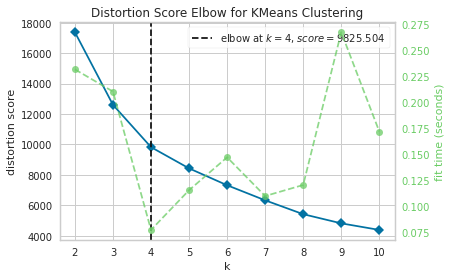

In [735]:
# 4. Performing Elbow Method
plt_elb = KElbowVisualizer(KMeans(), k=10)
plt_elb.fit(df_pca)
plt_elb.show();

In [739]:
range_n_clusters = list (range(2,10))
range_n_clusters

[2, 3, 4, 5, 6, 7, 8, 9]

In [746]:
from sklearn.metrics import silhouette_score
range_n_clusters = list (range(2,15))

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters)
    kmeans.fit(df_pca)
    predictions = kmeans.predict(df_pca)
    centers = kmeans.cluster_centers_

    score = silhouette_score(df_pca, predictions)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.44891962753710163)
For n_clusters = 3, silhouette score is 0.42563526969727883)
For n_clusters = 4, silhouette score is 0.3934879351773999)
For n_clusters = 5, silhouette score is 0.3968649013459034)
For n_clusters = 6, silhouette score is 0.32843485366514263)
For n_clusters = 7, silhouette score is 0.33565639944151043)
For n_clusters = 8, silhouette score is 0.36685785274253574)
For n_clusters = 9, silhouette score is 0.36925714187355463)
For n_clusters = 10, silhouette score is 0.37818776837884494)
For n_clusters = 11, silhouette score is 0.3821173396925304)
For n_clusters = 12, silhouette score is 0.38030506757149124)
For n_clusters = 13, silhouette score is 0.3666828519409081)
For n_clusters = 14, silhouette score is 0.3587430428530652)


In [771]:
kmeans = KMeans(4)
kmeans.fit(df_pca)
predictions = kmeans.predict(df_pca)

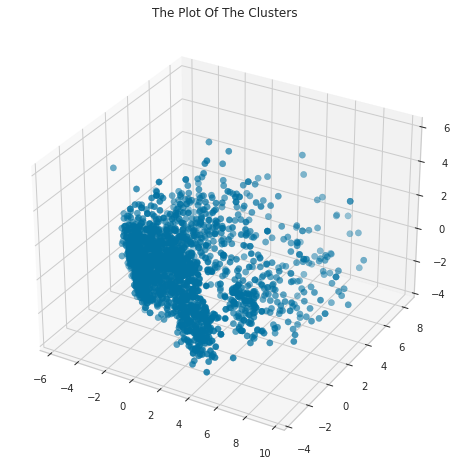

In [773]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(df_pca['f1'], df_pca['f2'], df_pca['f3'], s=40,  marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [774]:
df_pca["Clusters"] = predictions
#Adding the Clusters feature to the orignal dataframe.
raw_ifood_df["Clusters"]= predictions

In [775]:
df_pca.head()

,f1,f2,f3,Clusters
0,4.799150,0.203854,-0.464473,0
1,-3.167180,-0.066466,-0.219090,1
2,1.822450,-1.925653,-0.711298,3
3,-2.960248,0.080942,-1.591780,2
4,-0.661490,-0.837643,0.163342,1


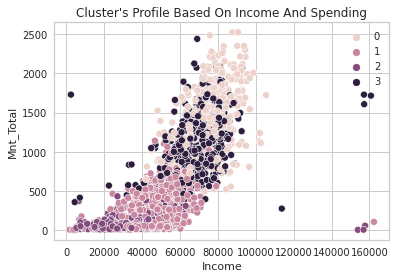

In [776]:
pl = sns.scatterplot(data = raw_ifood_df,x=raw_ifood_df["Income"], y=raw_ifood_df["Mnt_Total"],hue=raw_ifood_df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [798]:
kmeans_0 = raw_ifood_df[raw_ifood_df["Clusters"]==0]
kmeans_1 = raw_ifood_df[raw_ifood_df["Clusters"]==1]
kmeans_2 = raw_ifood_df[raw_ifood_df["Clusters"]==2]
kmeans_3 = raw_ifood_df[raw_ifood_df["Clusters"]==3]

round(kmeans_0.groupby('Child_number')['Pos_response'].mean().sort_values(ascending = False)*100,2)

print(kmeans_0['Child_number'].sum()/kmeans_0['Child_number'].count())
print(kmeans_1['Child_number'].sum()/kmeans_1['Child_number'].count())
print(kmeans_2['Child_number'].sum()/kmeans_2['Child_number'].count())
print(kmeans_3['Child_number'].sum()/kmeans_3['Child_number'].count())

0.22356495468277945
1.5896414342629481
0.833922261484099
0.6283185840707964


In [810]:
round(raw_ifood_df.groupby('Clusters')['Response'].mean().sort_values(ascending = False)*100,2)

Clusters
0    58.91
2    11.13
1     8.50
3     1.95
Name: Response, dtype: float64

In [820]:
kmeans_0['Response'].sum()

195

In [821]:
raw_ifood_df['Response'].sum()

333

In [822]:
195/333

0.5855855855855856

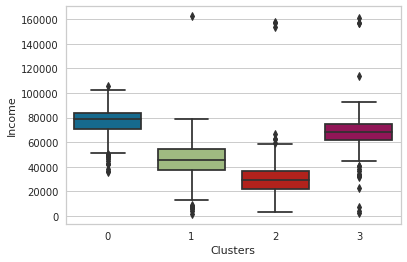

In [777]:
ax = sns.boxplot(x="Clusters", y="Income", data=raw_ifood_df)

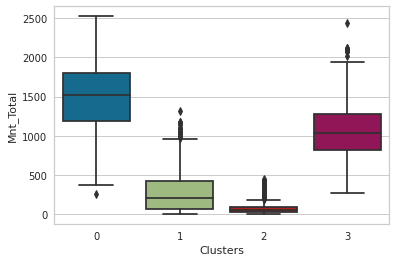

In [778]:
ax = sns.boxplot(x="Clusters", y="Mnt_Total", data=raw_ifood_df)

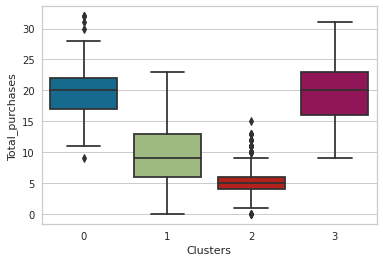

In [779]:
ax = sns.boxplot(x="Clusters", y="Total_purchases", data=raw_ifood_df)

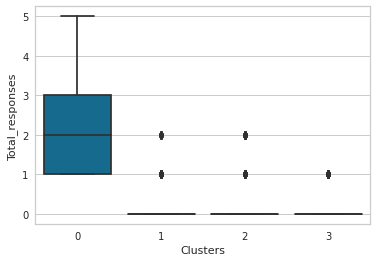

In [809]:
ax = sns.boxplot(x="Clusters", y="Total_responses", data=raw_ifood_df)

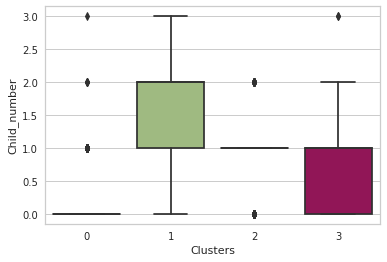

In [781]:
ax = sns.boxplot(x="Clusters", y="Child_number", data=raw_ifood_df)

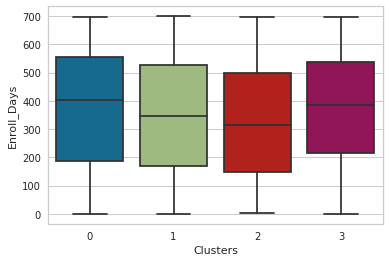

In [782]:
ax = sns.boxplot(x="Clusters", y="Enroll_Days", data=raw_ifood_df)